In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.set_option('display.max_columns', None)
# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [3]:
df = pd.read_csv("../../data/processed/2_aggregated_pueblos.csv")
df.shape

(7840, 41)

In [4]:
df['province'].unique()
df[df.towns_in_vicinity.isnull()]

df = df.dropna(subset=['towns_in_vicinity'])


In [5]:
province_to_autonomous_community = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Illes Balears': 'Illes Balears',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Castellón': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'A Coruña': 'Galicia',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Gipuzkoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Jaén': 'Andalucía',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'La Rioja': 'La Rioja',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Murcia': 'Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Asturias': 'Asturias',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Cantabria': 'Cantabria',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Bizkaia': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón'
}

In [6]:
df['autonomous_community'] = df['province'].map(province_to_autonomous_community)

In [7]:
df = df.drop(columns=[col for col in df.columns if col.startswith('n_')])
df = df.sort_values(['latitude', 'longitude'], ascending=False)

## Scoring Hospitals

In [8]:
df.reset_index(drop=True, inplace=True)
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_area,autonomous_community
0,48067,Bizkaia,Muxika,18.95764,-2.692941,43.28967,302,96,101,463,584,810,736,1546,Aeropuerto de Bilbao,17.538797,Vitoria/Gasteiz,49.813235,12.530042,Hospital Galdakao-Usansolo,0.288898,Urretxindorra Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,784.0,Mid,0.7180,Good,15,13,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",4.10,16.823071,País Vasco
1,15064,A Coruña,Paderne,151.44100,-8.176355,43.28677,265,119,160,648,1199,1173,1218,2391,Aeropuerto de A Coruña,16.418949,Betanzos-Cidade,3.219046,18.060709,Hospital Maritimo De Oza,2.891490,CPR Plurilingüe Nuestra Señora del Carmen,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",1277.0,Mid,0.8460,Excellent,15,2,"15001, 15003, 15006, 15009, 15010, 15021, 1502...",5.90,14.034524,Galicia
2,15039,A Coruña,Irixoa,362.87660,-8.058925,43.28474,119,61,95,364,694,666,667,1333,Aeropuerto de A Coruña,25.929988,Oza Dos Rios,12.729931,24.662261,Hospital Juan Cardona,2.337612,CPI Plurilingüe Virxe da Cela,Cfb,Oceanic Climate - Mild temperatures and consis...,788.0,Mid,0.6420,Good,15,2,"15001, 15003, 15009, 15010, 15021, 15024, 1502...",0.00,8.933750,Galicia
3,48062,Bizkaia,Mendata,107.88860,-2.633333,43.28333,58,28,32,113,151,201,181,382,Aeropuerto de Bilbao,22.420417,Vitoria/Gasteiz,49.185946,16.396774,Hospital Galdakao-Usansolo,3.845322,Munitibar Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,213.0,Small,0.7410,Good,15,13,"1002, 1003, 1018, 1036, 1042, 1063, 20003, 200...",0.00,15.153360,País Vasco
4,48905,Bizkaia,Zamudio,44.55854,-2.866667,43.28333,528,226,291,1016,1251,1650,1662,3312,Aeropuerto de Bilbao,3.998229,Vitoria/Gasteiz,51.562825,4.828458,Imq Clínica Virgen Blanca,0.272147,Zamudio Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1497.0,Big,0.9425,Excellent,15,12,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",35.25,31.005961,País Vasco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,11007,Cádiz,Barbate,15.97273,-5.918903,36.19282,3720,1797,2572,6793,7843,11326,11399,22725,Helipuerto de Algeciras,43.604312,Los Barrios,41.263907,28.159006,Hospital Viamed Novo Sancti Petri,0.084531,C.E.I.P. Estrella del Mar,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",11870.0,Big,0.9915,Excellent,1,6,"11001, 11014, 11015, 11025, 11031, 11035, 1103...",69.35,98.668750,Andalucía
7612,11022,Cádiz,"Línea de la Concepción, La",10.40490,-5.348256,36.16118,11924,4933,8008,19871,20251,32036,32951,64987,Helipuerto de Algeciras,9.068408,San Roque-La Linea,9.561508,1.236263,Hospital De La Línea De La Concepción,0.343316,C.D.P. Providencia del Sagrado Corazón,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",29253.0,Big,0.9830,Excellent,1,7,"11004, 11013, 11021, 11033, 11035, 29041, 2905...",167.90,160.098442,Andalucía
7613,11004,Cádiz,Algeciras,22.40544,-5.447698,36.12978,24311,10234,13808,38778,37916,61554,63493,125047,Helipuerto de Algeciras,0.632320,Algeciras,0.383585,2.095711,Hospital Punta De Europa,0.187878,I.E.S. Levante,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",54701.0,Big,0.9525,Excellent,1,7,"11013, 11021, 11022, 11033, 11035, 29041, 2906...",383.25,248.112500,Andalucía
7614,11035,Cádiz,Tarifa,14.66109,-5.602954,36.01271,2983,1261,2021,6330,6062,9325,9332,18657,Helipuerto de Algeciras,19.477945,Algeciras,18.758218,17.964609,Hospital Punta De Europa,0.239704,C.E.I.P. Guzmán El Bueno,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",12100.0,Big,0.9335,Excellent,1,7,"11004

In [9]:


# define bins for the hospital distance (adjust thresholds as needed)
hospital_bins = [df['closest_distance_hospital'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_hospital'].max()]
school_bins = [df['closest_distance_school'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_school'].max()]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# bin the values into categories
df['closest_distance_hospital_bin'] = pd.cut(df['closest_distance_hospital'], bins=hospital_bins, labels=labels, include_lowest=True)
df['closest_distance_school_bin'] = pd.cut(df['closest_distance_school'], bins=school_bins, labels=labels, include_lowest=True)

# apply score based on the bins (10 is best)
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}

df['hospital_distance_score'] = df['closest_distance_hospital_bin'].map(score_mapping)
df['school_distance_score'] = df['closest_distance_school_bin'].map(score_mapping)

# second step
def combine_scores(row, column):
    base_score = row[column]
    vicinity = row[column]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin([vicinity]), column]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["hospital_score_area"] = df.apply(lambda row: combine_scores(row, column="hospital_distance_score"), axis=1)
df["school_score_area"] = df.apply(lambda row: combine_scores(row, column="school_distance_score"), axis=1)

In [10]:
df.drop(columns=["closest_distance_hospital_bin", "closest_distance_school_bin"], axis=1, inplace=True)

In [11]:
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}


airport_score_mapping = {
    '<10': 10,
    '10-15': 8,
    '15-30': 6,
    '30-50': 4,
    '50-100': 3,
    '100+': 1
}

df_transport = df[['closest_distance_train', 'closest_distance_airport' ]]

train_bins = [df['closest_distance_train'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_train'].max()]
train_labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

airport_bins = [df['closest_distance_airport'].min() - 0.001, 10, 15, 30, 50, 100, df['closest_distance_airport'].max()]
airport_labels = ['<10', '10-15', '15-30', '30-50', '50-100', '100+']

# bin the train and airport distances using the provided bins and labels
df['train_distance_bin'] = pd.cut(df['closest_distance_train'], bins=train_bins, labels=train_labels, include_lowest=True)
df['airport_distance_bin'] = pd.cut(df['closest_distance_airport'], bins=airport_bins, labels=airport_labels, include_lowest=True)

# map the binned categories to scores using the score_mapping
df['train_distance_score'] = df['train_distance_bin'].map(score_mapping)
df['airport_distance_score'] = df['airport_distance_bin'].map(airport_score_mapping)

# compute a weighted transportation score (equal weight is used here; adjust weights if needed)
df['transport_score'] = (pd.to_numeric(df['train_distance_score']) + pd.to_numeric(df['airport_distance_score'])) / 2



In [12]:
df.sample(6)

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_area,autonomous_community,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_bin,airport_distance_bin,train_distance_score,airport_distance_score,transport_score
1947,8265,Barcelona,Sant Vicenç de Torelló,558.86440,2.272757,42.06234,371,163,201,623,732,1040,1050,2090,Aeropuerto de Girona - Costa Brava,44.467113,Girona,45.995390,14.026541,Hospital Universitari De Vic,0.726650,Llar d'infants Els Gallarets,Cfa,Humid Subtropical - Hot summers with year-roun...,919.0,Mid,0.9590,Excellent,13,23,"8004, 8010, 8011, 8012, 8014, 8016, 8017, 8018...",9.0,11.154107,Cataluña,6,10,3.0,5.0,30+,30-50,1,4,2.5
2238,49248,Zamora,Villalobos,725.78500,-5.474838,41.94585,16,8,15,51,102,94,98,192,Aeropuerto de Valladolid,58.321718,Toro,48.801512,17.969413,Hospital De Benavente,7.626516,Cra De Villanueva Del Campo,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",191.0,Small,0.6450,Good,13,7,"24002, 24003, 24005, 24032, 24042, 24054, 2407...",0.0,0.509783,Castilla y León,4,8,2.0,4.0,30+,50-100,1,3,2.0
3506,8204,Barcelona,Sant Climent de Llobregat,80.42606,1.995780,41.33731,811,380,371,1376,1243,2098,2083,4181,Aeropuerto de Barcelona - El prat,8.751092,Roda De Mar,48.275681,3.151058,Hospital De Viladecans,0.307255,Llar d'infants Sant Climent,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",1590.0,Big,0.9295,Excellent,12,22,"8001, 8003, 8013, 8015, 8019, 8020, 8025, 8027...",12.6,55.399927,Cataluña,10,10,5.0,5.0,30+,<10,1,10,5.5
4600,44200,Teruel,Rubielos de la Cérida,1230.61200,-1.212446,40.77098,0,0,2,5,19,17,9,26,Aeropuerto de Zaragoza,100.715319,Torrijo Del Campo,12.414735,49.435716,Hospital Obispo Polanco,12.026714,Escuela De M�sica,Cfb,Oceanic Climate - Mild temperatures and consis...,69.0,Very Small,0.1500,Poor,10,16,"19213, 19222, 19255, 19271, 19272, 44003, 4400...",0.0,0.184559,Aragón,1,6,0.5,3.0,10-15,100+,6,1,3.5
5399,45159,Toledo,Sartajada,460.23890,-4.791722,40.21156,8,2,4,31,54,61,38,99,Aeropuerto de Madrid - Cuatro vientos,87.395848,Talavera De La Reina,26.917900,27.424659,Hospital General Nuestra Señora Del Prado,8.030120,Doña Concepción Arenal,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",97.0,Very Small,0.9470,Excellent,9,8,"5002, 5013, 5014, 5022, 5041, 5047, 5054, 5055...",0.0,5.285259,Castilla-La Mancha,2,8,1.0,4.0,25-30,50-100,2,3,2.5
3626,47079,Valladolid,Llano de Olmedo,780.74070,-4.614570,41.26710,0,1,4,14,32,27,24,51,Aeropuerto de Valladolid,52.818536,Pozaldez,21.629361,25.058115,Hospital Medina Del Campo,6.076992,Alborada,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",48.0,Very Small,0.1500,Poor,11,9,"5001, 5008, 5016, 5023, 5026, 5034, 5046, 5056...",0.0,1.977143,Castilla y León,2,8,1.0,4.0,20-25,50-100,3,3,3.0


In [13]:
df.drop(columns=[col for col in df.columns if col.endswith('_bin')], inplace=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'cmun'),
  Text(1, 0, 'altitude'),
  Text(2, 0, 'longitude'),
  Text(3, 0, 'latitude'),
  Text(4, 0, '0-17'),
  Text(5, 0, '18-24'),
  Text(6, 0, '25-34'),
  Text(7, 0, '35-54'),
  Text(8, 0, '55+'),
  Text(9, 0, 'male'),
  Text(10, 0, 'female'),
  Text(11, 0, 'total_population'),
  Text(12, 0, 'closest_distance_airport'),
  Text(13, 0, 'closest_distance_train'),
  Text(14, 0, 'closest_distance_hospital'),
  Text(15, 0, 'closest_distance_school'),
  Text(16, 0, 'number_of_houses'),
  Text(17, 0, 'connectivity_score'),
  Text(18, 0, 'economy_score'),
  Text(19, 0, 'economy_score_area'),
  Text(20, 0, 'hospital_score_area'),
  Text(21, 0, 'school_score_area'),
  Text(22, 0, 'transport_score')])

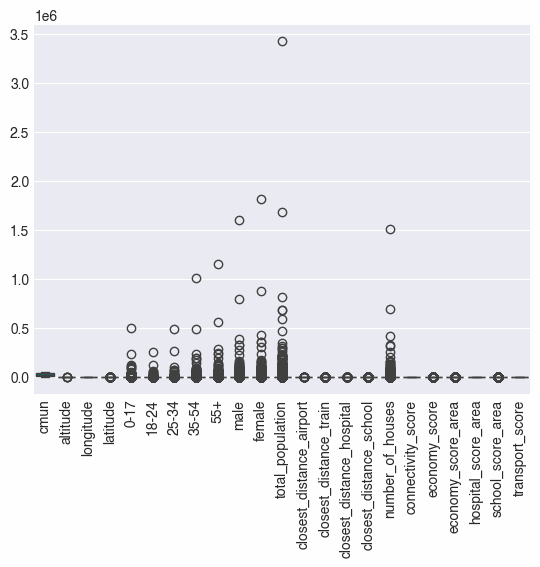

In [14]:
sns.boxplot(df, color="teal")
plt.xticks(rotation=90)

In [15]:
# Define age group columns
age_groups = ["0-17", "18-24", "25-34", "35-54", "55+"]

# Sum only the age group columns
df["total_population"] = df[age_groups].sum(axis=1)

# Compute percentages for each age group
for col in age_groups:
    df[col + "_pct"] = (df[col] / df["total_population"]) * 100

In [16]:
# Define weights for age score
weights = {
    "0-17_pct": 0.5,
    "18-24_pct": 1.0,
    "25-34_pct": 2.0,
    "35-54_pct": 1.5,
    "55+_pct": -1.5  # Negative because higher elderly % means aging town
}

# Compute weighted score
df["age_score"] = sum(df[col] * weight for col, weight in weights.items())

df


,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,towns_in_vicinity,economy_score,economy_score_area,autonomous_community,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,age_score
0,48067,Bizkaia,Muxika,18.95764,-2.692941,43.28967,302,96,101,463,584,810,736,1546,Aeropuerto de Bilbao,17.538797,Vitoria/Gasteiz,49.813235,12.530042,Hospital Galdakao-Usansolo,0.288898,Urretxindorra Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,784.0,Mid,0.7180,Good,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",4.10,16.823071,País Vasco,6,10,3.0,5.0,1,6,3.5,19.534282,6.209573,6.532988,29.948254,37.774903,17.302717
1,15064,A Coruña,Paderne,151.44100,-8.176355,43.28677,265,119,160,648,1199,1173,1218,2391,Aeropuerto de A Coruña,16.418949,Betanzos-Cidade,3.219046,18.060709,Hospital Maritimo De Oza,2.891490,CPR Plurilingüe Nuestra Señora del Carmen,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",1277.0,Mid,0.8460,Excellent,"15001, 15003, 15006, 15009, 15010, 15021, 1502...",5.90,14.034524,Galicia,4,10,2.0,5.0,10,6,8.0,11.083229,4.976997,6.691761,27.101631,50.146382,-10.664994
2,15039,A Coruña,Irixoa,362.87660,-8.058925,43.28474,119,61,95,364,694,666,667,1333,Aeropuerto de A Coruña,25.929988,Oza Dos Rios,12.729931,24.662261,Hospital Juan Cardona,2.337612,CPI Plurilingüe Virxe da Cela,Cfb,Oceanic Climate - Mild temperatures and consis...,788.0,Mid,0.6420,Good,"15001, 15003, 15009, 15010, 15021, 15024, 1502...",0.00,8.933750,Galicia,3,10,1.5,5.0,6,6,6.0,8.927232,4.576144,7.126782,27.306827,52.063016,-13.840960
3,48062,Bizkaia,Mendata,107.88860,-2.633333,43.28333,58,28,32,113,151,201,181,382,Aeropuerto de Bilbao,22.420417,Vitoria/Gasteiz,49.185946,16.396774,Hospital Galdakao-Usansolo,3.845322,Munitibar Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,213.0,Small,0.7410,Good,"1002, 1003, 1018, 1036, 1042, 1063, 20003, 200...",0.00,15.153360,País Vasco,4,10,2.0,5.0,1,6,3.5,15.183246,7.329843,8.376963,29.581152,39.528796,16.753927
4,48905,Bizkaia,Zamudio,44.55854,-2.866667,43.28333,528,226,291,1016,1251,1650,1662,3312,Aeropuerto de Bilbao,3.998229,Vitoria/Gasteiz,51.562825,4.828458,Imq Clínica Virgen Blanca,0.272147,Zamudio Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1497.0,Big,0.9425,Excellent,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",35.25,31.005961,País Vasco,10,10,5.0,5.0,1,10,5.5,15.942029,6.823671,8.786232,30.676329,37.771739,21.724034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,11007,Cádiz,Barbate,15.97273,-5.918903,36.19282,3720,1797,2572,6793,7843,11326,11399,22725,Helipuerto de Algeciras,43.604312,Los Barrios,41.263907,28.159006,Hospital Viamed Novo Sancti Petri,0.084531,C.E.I.P. Estrella del Mar,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",11870.0,Big,0.9915,Excellent,"11001, 11014, 11015, 11025, 11031, 11035, 1103...",69.35,98.668750,Andalucía,2,10,1.0,5.0,1,4,2.5,16.369637,7.907591,11.317932,29.892189,34.512651,31.797580
7612,11022,Cádiz,"Línea de la Concepción, La",10.40490,-5.348256,36.16118,11924,4933,8008,19871,20251,32036,32951,64987,Helipuerto de Algeciras,9.068408,San Roque-La Linea,9.561508,1.236263,Hospital De La Línea De La Concepción,0.343316,C.D.P. Providencia del Sagrado Corazón,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",29253.0,Big,0.9830,Excellent,"11004, 11013, 11021, 11033, 11035, 29041, 2905...",167.90,160.098442,Andalucía,10,10,5.0,5.0,8,10,9.0

In [17]:
def categorize_by_age_score(score):
    if score > 50:
        return "Very Young Town"
    elif score > 30:
        return "Young & Growing"
    elif score > 10:
        return "Balanced Town"
    elif score > 0:
        return "Aging Town"
    else:
        return "Highly Aging Town"

# Apply final categorization
df["final_age_category"] = df["age_score"].apply(categorize_by_age_score)




([0, 1, 2, 3, 4],
 [Text(0, 0, 'Balanced Town'),
  Text(1, 0, 'Highly Aging Town'),
  Text(2, 0, 'Very Young Town'),
  Text(3, 0, 'Young & Growing'),
  Text(4, 0, 'Aging Town')])

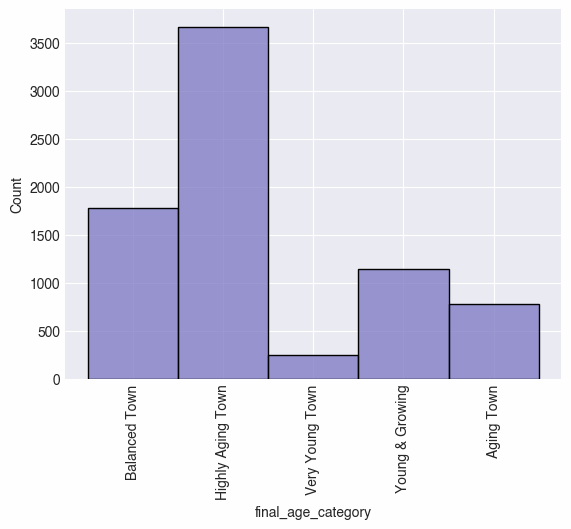

In [18]:
sns.histplot(df["final_age_category"])
plt.xticks(rotation=90)

In [19]:
df.to_csv("../../data/processed/3_aggregated_pueblos.csv", index=False)